# Matrix Inversion Stability

This notebook is to investigate how relative differences between two matrices with similar values compare to the relative differences between their corresponding inverses. offhand it may appear that such matrices should have inverses that are roughly "as close" as the original matrices but since maytrix inversion is not a linear transformation, this is not guaranteed. Recall that for a matrix $A$,
$$
A^{-1} = \frac{1}{\det(A)}\text{adj}(A) 
$$
where $\text{adj}(A)$, the adjugate of A, is the transpose of the cofactor matrix of $A$, 

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cmap=sns.diverging_palette(5, 250, as_cmap=True)

## Simple $3\times3$ matrix

### Setup an invertible matrix and its inverse

In [3]:
m = pd.DataFrame(np.array([[1,1,1],[1,-2,2],[1,2,-3]]))
m_inv = pd.DataFrame(np.linalg.inv(m.values))

In [4]:
m

,0,1,2
0,1,1,1
1,1,-2,2
2,1,2,-3


In [5]:
m_inv

,0,1,2
0,0.181818,0.454545,0.363636
1,0.454545,-0.363636,-0.090909
2,0.363636,-0.090909,-0.272727


Check that $m \times m^{-1} = 1$

In [6]:
m.dot(m_inv)

,0,1,2
0,1.000000e+00,-1.387779e-17,0.0
1,2.220446e-16,1.000000e+00,0.0
2,5.551115e-17,-1.387779e-17,1.0


### Add small perturbations to entries

In [7]:
delta = 0.001
m2 = m.copy()

In [8]:
for i in range(3):
    for j in range(3):
        if (i+j)%2:
            m2.iloc[i, j] += delta*m.iloc[i, j]
        else:
            m2.iloc[i, j] -= delta*m.iloc[i, j]
m2_inv = pd.DataFrame(np.linalg.inv(m2.values))

In [9]:
m2

,0,1,2
0,0.999,1.001,0.999
1,1.001,-1.998,2.002
2,0.999,2.002,-2.997


In [10]:
m2_inv

,0,1,2
0,0.180344,0.455414,0.364332
1,0.455414,-0.363603,-0.091083
2,0.364332,-0.091083,-0.273067


### Check relative differences in $m$ and $m^{-1}$

In [11]:
((m2-m)/m).style.background_gradient(cmap=cmap, axis=None)

,0,1,2
0,-0.001,0.001,-0.001
1,0.001,-0.001,0.001
2,-0.001,0.001,-0.001


In [12]:
((m2_inv - m_inv)/m_inv).style.background_gradient(cmap=cmap, axis=None)

,0,1,2
0,-0.00810728,0.00190983,0.00191183
1,0.00190983,-9.19926e-05,0.00190983
2,0.00191183,0.00190983,0.00124389


## Simple $4\times4$ matrix

### Setup an invertible matrix and its inverse

In [13]:
m = pd.DataFrame(np.array([[1,1,1,-1],[1,1,-1,1],[1,-1,1,1],[-1,1,1,1]]))
m_inv = pd.DataFrame(np.linalg.inv(m.values))

In [14]:
m

,0,1,2,3
0,1,1,1,-1
1,1,1,-1,1
2,1,-1,1,1
3,-1,1,1,1


In [15]:
m_inv

,0,1,2,3
0,0.25,0.25,0.25,-0.25
1,0.25,0.25,-0.25,0.25
2,0.25,-0.25,0.25,0.25
3,-0.25,0.25,0.25,0.25


Check that $m \times m^{-1} = 1$

In [16]:
m.dot(m_inv)

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0


### Add small perturbations to entries

In [17]:
delta = 0.001
m2 = m.copy()

In [18]:
for i in range(len(m2)):
    for j in range(len(m2)):
        if (i+j)%2:
            m2.iloc[i, j] += delta*m.iloc[i, j]
        else:
            m2.iloc[i, j] -= delta*m.iloc[i, j]
m2_inv = pd.DataFrame(np.linalg.inv(m2.values))

In [19]:
m2

,0,1,2,3
0,0.999,1.001,0.999,-1.001
1,1.001,0.999,-1.001,0.999
2,0.999,-1.001,0.999,1.001
3,-1.001,0.999,1.001,0.999


In [20]:
m2_inv

,0,1,2,3
0,0.25025,0.24975,0.25025,-0.24975
1,0.24975,0.25025,-0.24975,0.25025
2,0.25025,-0.24975,0.25025,0.24975
3,-0.24975,0.25025,0.24975,0.25025


### Check relative differences in $m$ and $m^{-1}$

In [21]:
((m2-m)/m).style.background_gradient(cmap=cmap, axis=None)

,0,1,2,3
0,-0.001,0.001,-0.001,0.001
1,0.001,-0.001,0.001,-0.001
2,-0.001,0.001,-0.001,0.001
3,0.001,-0.001,0.001,-0.001


In [22]:
((m2_inv - m_inv)/m_inv).style.background_gradient(cmap=cmap, axis=None)

,0,1,2,3
0,0.001001,-0.000999001,0.001001,-0.000999001
1,-0.000999001,0.001001,-0.000999001,0.001001
2,0.001001,-0.000999001,0.001001,-0.000999001
3,-0.000999001,0.001001,-0.000999001,0.001001


## Random $4\times4$ matrix

### Setup an invertible matrix and its inverse

In [104]:
# np.random.seed(0) # 0
m = pd.DataFrame(np.random.rand(4,4) * 10**(4))
m_inv = pd.DataFrame(np.linalg.inv(m.values))

In [105]:
m

,0,1,2,3
0,6886.611828,8804.758893,9182.354664,2168.221376
1,5651.888666,8651.025613,5089.689607,9167.229540
2,9211.576102,831.124926,2777.185613,93.567049
3,8423.420797,6471.741402,8413.861192,2647.301643


In [106]:
m_inv

,0,1,2,3
0,0.000066,0.000025,0.000177,-0.000145
1,0.000524,0.000069,0.000182,-0.000673
2,-0.000364,-0.000105,-0.000277,0.000671
3,-0.000333,0.000087,-0.000127,0.000352


Check that $m \times m^{-1} = 1$

In [107]:
m.dot(m_inv)

,0,1,2,3
0,1.000000e+00,-1.794805e-16,-4.221811e-16,3.732331e-16
1,1.488303e-17,1.000000e+00,-2.259511e-16,-6.453122e-16
2,2.265930e-17,-1.454211e-17,1.000000e+00,-2.096676e-16
3,3.306514e-16,5.813562e-17,-1.585938e-16,1.000000e+00


### Add small perturbations to entries

In [108]:
deltas = [0.001, 0.005, 0.002, 0.0001, 0.001, 0.001, 0.001, 0.002, 0.0001, 0.005]
m2 = m.copy()

In [109]:
np.random.seed(0)

In [110]:
for i in range(len(m2)):
    for j in range(len(m2)):
        if (i+j)%2:
            m2.iloc[i, j] += np.random.choice(deltas)*m.iloc[i, j]
        else:
            m2.iloc[i, j] -= np.random.choice(deltas)*m.iloc[i, j]
m2_inv = pd.DataFrame(np.linalg.inv(m2.values))

In [111]:
m2

,0,1,2,3
0,6879.725216,8813.563651,9181.436428,2168.438198
1,5663.192443,8607.770485,5090.198576,9158.062311
2,9193.152950,831.956051,2771.631242,93.660616
3,8424.263139,6471.094228,8455.930498,2644.654341


In [112]:
m2_inv

,0,1,2,3
0,0.000064,0.000024,0.000176,-0.000141
1,0.000513,0.000066,0.000175,-0.000654
2,-0.000355,-0.000102,-0.000270,0.000653
3,-0.000324,0.000089,-0.000123,0.000339


In [113]:
pd.concat([m_inv, m2_inv], axis=1, keys=["$m^{-1}$", "$m^{-1}_2$"])

$m^{-1}$                               $m^{-1}_2$                      \
          0         1         2         3          0         1         2   
0  0.000066  0.000025  0.000177 -0.000145   0.000064  0.000024  0.000176   
1  0.000524  0.000069  0.000182 -0.000673   0.000513  0.000066  0.000175   
2 -0.000364 -0.000105 -0.000277  0.000671  -0.000355 -0.000102 -0.000270   
3 -0.000333  0.000087 -0.000127  0.000352  -0.000324  0.000089 -0.000123   

             
          3  
0 -0.000141  
1 -0.000654  
2  0.000653  
3  0.000339

### Check relative differences in $m$ and $m^{-1}$

In [114]:
((m2-m)/m).style.background_gradient(cmap=cmap, axis=None)

,0,1,2,3
0,-0.001,0.001,-0.0001,0.0001
1,0.002,-0.005,0.0001,-0.001
2,-0.002,0.001,-0.002,0.001
3,0.0001,-0.0001,0.005,-0.001


In [115]:
((m2_inv-m_inv)/m_inv).style.background_gradient(cmap=cmap, axis=None)

,0,1,2,3
0,-0.032157,-0.026248,-0.00700636,-0.0271339
1,-0.0207206,-0.045653,-0.0390377,-0.0289961
2,-0.0262824,-0.0279896,-0.0240694,-0.0266689
3,-0.0248591,0.0240264,-0.0335829,-0.0383917


In [116]:
((m2-m)/m).values.mean()

-0.00011875000000003154

The average relative difference for $m^{-1}$ and $m_2^{-1}$ is

In [117]:
((m2_inv - m_inv)/m_inv).values.mean()

-0.025298138716746854

## Random $5\times5$ matrix

### Setup an invertible matrix and its inverse

In [118]:
# np.random.seed(0) # 0
m = pd.DataFrame(np.random.rand(5,5) * 10**(4))
m_inv = pd.DataFrame(np.linalg.inv(m.values))

In [119]:
m

,0,1,2,3,4
0,8121.687288,4799.771724,3927.847961,8360.787635,3373.961604
1,6481.718721,3682.415398,9571.551590,1403.507804,8700.872584
2,4736.080453,8009.107520,5204.774796,6788.795301,7206.326547
3,5820.197921,5373.732294,7586.156243,1059.076072,4736.004193
4,1863.323433,7369.181771,2165.503544,1352.181734,3241.410078


In [120]:
m_inv

,0,1,2,3,4
0,0.000294,0.000287,-0.000449,-0.000315,0.000383
1,-0.000021,-0.000090,0.000006,0.000084,0.000127
2,-0.000246,-0.000353,0.000386,0.000585,-0.000509
3,-0.000067,-0.000207,0.000309,0.000174,-0.000315
4,0.000071,0.000361,-0.000142,-0.000472,0.000273


Check that $m \times m^{-1} = 1$

In [121]:
m.dot(m_inv)

,0,1,2,3,4
0,1.000000e+00,8.809184e-17,1.301203e-16,-6.711951e-17,1.363828e-17
1,-9.969829e-17,1.000000e+00,-7.615270e-17,-1.478526e-16,3.171857e-16
2,1.442190e-16,1.832864e-16,1.000000e+00,-7.737204e-16,7.623226e-16
3,-1.350547e-17,-1.147656e-16,-2.731185e-16,1.000000e+00,3.596938e-16
4,3.160657e-18,-1.927510e-16,2.282030e-16,2.519868e-16,1.000000e+00


### Add small perturbations to entries

In [122]:
deltas = [0.001, 0.005, 0.002, 0.0001, 0.001, 0.001, 0.001, 0.002, 0.0001, 0.005]
m2 = m.copy()

In [123]:
# np.random.seed(0)

In [124]:
for i in range(len(m2)):
    for j in range(len(m2)):
        if (i+j)%2:
            m2.iloc[i, j] += np.random.choice(deltas)*m.iloc[i, j]
        else:
            m2.iloc[i, j] -= np.random.choice(deltas)*m.iloc[i, j]
m2_inv = pd.DataFrame(np.linalg.inv(m2.values))

In [125]:
m2

,0,1,2,3,4
0,8113.565600,4804.571495,3927.455176,8361.623714,3367.213681
1,6514.127314,3682.047157,9581.123141,1400.700789,8709.573456
2,4726.608292,8017.116627,5204.254318,6789.474181,7170.294915
3,5826.018119,5362.984830,7601.328556,1058.970164,4759.684214
4,1861.460110,7406.027680,2165.286994,1358.942643,3238.168668


In [126]:
m2_inv

,0,1,2,3,4
0,0.000291,0.000282,-0.000444,-0.000309,0.000375
1,-0.000020,-0.000088,0.000005,0.000082,0.000127
2,-0.000242,-0.000351,0.000381,0.000581,-0.000501
3,-0.000065,-0.000203,0.000304,0.000169,-0.000309
4,0.000068,0.000360,-0.000138,-0.000470,0.000267


In [127]:
pd.concat([m_inv, m2_inv], axis=1, keys=["$m^{-1}$", "$m^{-1}_2$"])

$m^{-1}$                                         $m^{-1}_2$            \
          0         1         2         3         4          0         1   
0  0.000294  0.000287 -0.000449 -0.000315  0.000383   0.000291  0.000282   
1 -0.000021 -0.000090  0.000006  0.000084  0.000127  -0.000020 -0.000088   
2 -0.000246 -0.000353  0.000386  0.000585 -0.000509  -0.000242 -0.000351   
3 -0.000067 -0.000207  0.000309  0.000174 -0.000315  -0.000065 -0.000203   
4  0.000071  0.000361 -0.000142 -0.000472  0.000273   0.000068  0.000360   

                                 
          2         3         4  
0 -0.000444 -0.000309  0.000375  
1  0.000005  0.000082  0.000127  
2  0.000381  0.000581 -0.000501  
3  0.000304  0.000169 -0.000309  
4 -0.000138 -0.000470  0.000267

### Check relative differences in $m$ and $m^{-1}$

In [128]:
((m2-m)/m).style.background_gradient(cmap=cmap, axis=None)

,0,1,2,3,4
0,-0.001,0.001,-0.0001,0.0001,-0.002
1,0.005,-0.0001,0.001,-0.002,0.001
2,-0.002,0.001,-0.0001,0.0001,-0.005
3,0.001,-0.002,0.002,-0.0001,0.005
4,-0.001,0.005,-0.0001,0.005,-0.001


In [129]:
((m2_inv-m_inv)/m_inv).style.background_gradient(cmap=cmap, axis=None)

,0,1,2,3,4
0,-0.0105724,-0.0149945,-0.0113008,-0.0191009,-0.0202464
1,-0.0443121,-0.0128332,-0.248041,-0.0140008,0.00644308
2,-0.0132028,-0.00508551,-0.0131934,-0.00598424,-0.0160081
3,-0.0371494,-0.0177555,-0.0131903,-0.0283651,-0.0192087
4,-0.0417321,-0.00262186,-0.032233,-0.00359323,-0.0210085


In [130]:
((m2-m)/m).values.mean()

0.00042799999999998807

The average relative difference for $m^{-1}$ and $m_2^{-1}$ is

In [131]:
((m2_inv - m_inv)/m_inv).values.mean()

-0.02637164264498152

## Random $6\times6$ matrix

### Setup an invertible matrix and its inverse

In [132]:
# np.random.seed(0) # 0
m = pd.DataFrame(np.random.rand(6,6) * 10**(4))
m_inv = pd.DataFrame(np.linalg.inv(m.values))

In [133]:
m

,0,1,2,3,4,5
0,202.183974,8326.198455,7781.567509,8700.121482,9786.183422,7991.585642
1,4614.793623,7805.291763,1182.744259,6399.210213,1433.532874,9446.689170
2,5218.483218,4146.619400,2645.556121,7742.336894,4561.503322,5684.339489
3,187.898004,6176.354971,6120.957227,6169.339969,9437.480785,6818.202991
4,3595.079006,4370.319538,6976.311959,602.254716,6667.667154,6706.378696
5,2103.825611,1289.262977,3154.283509,3637.107709,5701.967704,4386.015135


In [134]:
m_inv

,0,1,2,3,4,5
0,-0.000232,-0.000072,0.000280,0.000188,0.000114,-0.000251
1,-0.000303,-0.000023,0.000213,0.000537,0.000066,-0.000610
2,0.000555,-0.000064,-0.000101,-0.000723,0.000114,0.000208
3,0.000269,-0.000016,0.000018,-0.000315,-0.000106,0.000174
4,-0.000465,-0.000068,0.000151,0.000666,-0.000013,-0.000217
5,0.000183,0.000189,-0.000336,-0.000332,-0.000051,0.000516


Check that $m \times m^{-1} = 1$

In [135]:
m.dot(m_inv)

,0,1,2,3,4,5
0,1.000000e+00,8.541438e-17,2.777606e-16,-4.123107e-16,1.777476e-16,4.533514e-16
1,1.048883e-15,1.000000e+00,-8.300426e-16,-1.577062e-15,3.377555e-16,2.379636e-16
2,-5.372693e-17,-7.828779e-18,1.000000e+00,-3.913030e-16,-2.320356e-18,4.431289e-17
3,3.395380e-16,1.883597e-16,-3.507036e-17,1.000000e+00,1.033200e-17,1.226347e-15
4,4.186784e-16,1.496581e-16,-6.595303e-16,-1.060982e-15,1.000000e+00,5.099937e-16
5,-4.686207e-16,1.444161e-16,-7.702625e-17,-2.422706e-16,1.198198e-16,1.000000e+00


### Add small perturbations to entries

In [136]:
deltas = [0.001, 0.005, 0.002, 0.0001, 0.001, 0.001, 0.001, 0.002, 0.0001, 0.005]
m2 = m.copy()

In [137]:
# np.random.seed(0)

In [138]:
for i in range(len(m2)):
    for j in range(len(m2)):
        if (i+j)%2:
            m2.iloc[i, j] += np.random.choice(deltas)*m.iloc[i, j]
        else:
            m2.iloc[i, j] -= np.random.choice(deltas)*m.iloc[i, j]
m2_inv = pd.DataFrame(np.linalg.inv(m2.values))

In [139]:
m2

,0,1,2,3,4,5
0,201.981790,8334.524654,7773.785942,8708.821604,9785.204804,7999.577228
1,4619.408416,7804.511234,1183.927003,6398.570292,1436.399940,9437.242481
2,5213.264734,4150.766019,2632.328340,7750.079231,4538.695806,5684.907923
3,188.085902,6170.178616,6127.078184,6138.493269,9456.355747,6811.384788
4,3587.888848,4374.689858,6975.614328,603.459226,6660.999487,6719.791454
5,2105.929436,1282.816662,3157.437793,3629.833494,5713.371640,4377.243104


In [140]:
m2_inv

,0,1,2,3,4,5
0,-0.000234,-0.000073,0.000282,0.000190,0.000114,-0.000253
1,-0.000302,-0.000023,0.000215,0.000536,0.000065,-0.000610
2,0.000548,-0.000067,-0.000099,-0.000714,0.000117,0.000203
3,0.000267,-0.000017,0.000018,-0.000313,-0.000105,0.000173
4,-0.000460,-0.000067,0.000150,0.000660,-0.000016,-0.000214
5,0.000184,0.000191,-0.000339,-0.000335,-0.000051,0.000518


In [141]:
pd.concat([m_inv, m2_inv], axis=1, keys=["$m^{-1}$", "$m^{-1}_2$"])

$m^{-1}$                                                   $m^{-1}_2$  \
          0         1         2         3         4         5          0   
0 -0.000232 -0.000072  0.000280  0.000188  0.000114 -0.000251  -0.000234   
1 -0.000303 -0.000023  0.000213  0.000537  0.000066 -0.000610  -0.000302   
2  0.000555 -0.000064 -0.000101 -0.000723  0.000114  0.000208   0.000548   
3  0.000269 -0.000016  0.000018 -0.000315 -0.000106  0.000174   0.000267   
4 -0.000465 -0.000068  0.000151  0.000666 -0.000013 -0.000217  -0.000460   
5  0.000183  0.000189 -0.000336 -0.000332 -0.000051  0.000516   0.000184   

                                                     
          1         2         3         4         5  
0 -0.000073  0.000282  0.000190  0.000114 -0.000253  
1 -0.000023  0.000215  0.000536  0.000065 -0.000610  
2 -0.000067 -0.000099 -0.000714  0.000117  0.000203  
3 -0.000017  0.000018 -0.000313 -0.000105  0.000173  
4 -0.000067  0.000150  0.000660 -0.000016 -0.000214  
5  0.000191 -0.000339 -0.000335 -0.000051  0.000518

### Check relative differences in $m$ and $m^{-1}$

In [142]:
((m2-m)/m).style.background_gradient(cmap=cmap, axis=None)

,0,1,2,3,4,5
0,-0.001,0.001,-0.001,0.001,-0.0001,0.001
1,0.001,-0.0001,0.001,-0.0001,0.002,-0.001
2,-0.001,0.001,-0.005,0.001,-0.005,0.0001
3,0.001,-0.001,0.001,-0.005,0.002,-0.001
4,-0.002,0.001,-0.0001,0.002,-0.001,0.002
5,0.001,-0.005,0.001,-0.002,0.002,-0.002


In [143]:
((m2_inv-m_inv)/m_inv).style.background_gradient(cmap=cmap, axis=None)

,0,1,2,3,4,5
0,0.00846884,0.015264,0.00772333,0.0150886,0.00107722,0.00706008
1,-0.00389689,0.0265827,0.00805417,-0.00213502,-0.0166104,-0.000449792
2,-0.0129582,0.0375819,-0.020929,-0.0122723,0.02888,-0.026146
3,-0.00739373,0.0301077,-0.014258,-0.00733128,-0.0123134,-0.00525884
4,-0.0114336,-0.0192375,-0.00333478,-0.00965786,0.188433,-0.0153178
5,0.00980011,0.00912564,0.00887142,0.00799338,0.00368348,0.00402762


In [144]:
((m2-m)/m).values.mean()

-0.00031388888888887463

The average relative difference for $m^{-1}$ and $m_2^{-1}$ is

In [145]:
((m2_inv - m_inv)/m_inv).values.mean()

0.006024694929226075

In [146]:
np.log(np.linalg.cond(m))

4.0554587828726065

## General Matrix: Plots of signed relative differences vs matrix size

### Setup
Initialize empty arrays of size 100 for matrices for sizes $2\times2$ upto $10\times10$

In [229]:
orig_rel_diffs = np.zeros((8, 100))
inv_rel_diffs  = np.zeros((8, 100))
deltas = [0.001, 0.005, 0.002, 0.0001, 0.001, 0.001, 0.001, 0.002, 0.0001, 0.005]

* Each row correpsonds to matrix size
* Each column for individual matrices' average relative difference values between the unperturbed and perturbed versions of the matrix

In [230]:
k = 0
for n in range(2, 10):
    done = 0
    while done < 100:
        try:
            m = np.random.rand(n, n) * 10**(4)
            m_inv = np.linalg.inv(m)
            m2 = m.copy()
            for i in range(len(m2)):
                for j in range(len(m2)):
                    if (i+j)%2:
                        m2[i, j] += np.random.choice(deltas)*m[i, j]
                    else:
                        m2[i, j] -= np.random.choice(deltas)*m[i, j]
            m2_inv = np.linalg.inv(m2)
            orig_rel_diff = ((m2-m)/m).mean()
            inv_rel_diff = ((m2_inv - m_inv)/m_inv).mean()
            orig_rel_diffs[k, done] = orig_rel_diff
            inv_rel_diffs[k, done] = inv_rel_diff
            if done == 0:
                print(k, n, done, orig_rel_diff)
            done += 1
        except:
            print(k)
            pass
    k += 1

0 2 0 -0.0014750000000000123
1 3 0 -0.000111111111111097
2 4 0 -0.0006312499999999912
3 5 0 0.0001920000000000053
4 6 0 -0.00041111111111111806
5 7 0 4.6938775510200216e-05
6 8 0 -0.0001515624999999937
7 9 0 -0.00018024691358024483


Calculate the means and standard deviatoins of these values

In [235]:
x = np.arange(2, 10)
y1 = orig_rel_diffs.mean(axis=1)
y1_err = orig_rel_diffs.std(axis=1)
y2 = inv_rel_diffs.mean(axis=1)
y2_err = inv_rel_diffs.std(axis=1)

### Make the plot

Text(0.5, 1.0, 'Average Relative Differences at Various Matrix Sizes')

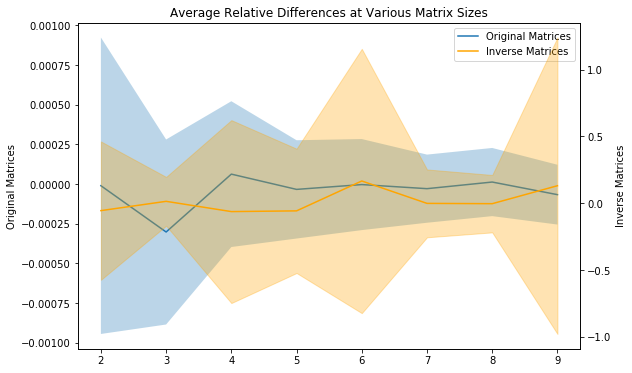

In [266]:
fig, ax1 = plt.subplots(figsize=(9,6))
ln1 = ax1.plot(x, y1, label="Original Matrices")
ax1.fill_between(x, y1-y1_err, y1+y1_err, alpha=0.3)
ax1.set_ylabel("Original Matrices")
# plt.yscale("symlog")


ax2 = ax1.twinx()
ln2 = ax2.plot(x, y2, color="orange", label="Inverse Matrices")
ax2.fill_between(x, y2-y2_err, y2+y2_err,alpha=0.3, color="orange")
ax2.set_ylabel("Inverse Matrices")
# plt.yscale("symlog")

lns = ln1+ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs)
plt.xlabel("Matrix Size")
plt.title("Average Relative Differences at Various Matrix Sizes")

## General Matrix: Plot of absolute relative differences vs matrix size

### Setup
Initialize empty arrays of size 100 for matrices for sizes $2\times2$ upto $10\times10$

In [3]:
orig_rel_diffs = np.zeros((8, 100))
inv_rel_diffs  = np.zeros((8, 100))
deltas = [0.001, 0.005, 0.002, 0.0001, 0.001, 0.001, 0.001, 0.002, 0.0001, 0.005]

* Each row correpsonds to matrix size
* Each column for individual matrices' average relative difference values between the unperturbed and perturbed versions of the matrix

In [6]:
k = 0
for n in range(2, 10):
    done = 0
    while done < 100:
        try:
            m = np.random.rand(n, n) * 10**(4)
            m_inv = np.linalg.inv(m)
            m2 = m.copy()
            for i in range(len(m2)):
                for j in range(len(m2)):
                    if (i+j)%2:
                        m2[i, j] += np.random.choice(deltas)*m[i, j]
                    else:
                        m2[i, j] -= np.random.choice(deltas)*m[i, j]
            m2_inv = np.linalg.inv(m2)
            orig_rel_diff = abs((m2-m)/m).mean()
            inv_rel_diff = abs((m2_inv - m_inv)/m_inv).mean()
            orig_rel_diffs[k, done] = orig_rel_diff
            inv_rel_diffs[k, done] = inv_rel_diff
            if done == 0:
                print(k, n, done, orig_rel_diff)
            done += 1
        except:
            print(k)
            pass
    k += 1

0 2 0 0.0015499999999999872
1 3 0 0.002344444444444443
2 4 0 0.0023312499999999952
3 5 0 0.0020920000000000023
4 6 0 0.001888888888888876
5 7 0 0.0022040816326530654
6 8 0 0.001667187500000003
7 9 0 0.0018123456790123441


Calculate the means and standard deviatoins of these values

In [20]:
x = np.arange(2, 10)

y1 = orig_rel_diffs.mean(axis=1)
y1_low = orig_rel_diffs.min(axis=1)
y1_hi = orig_rel_diffs.max(axis=1)
y1_err = orig_rel_diffs.std(axis=1)

y2 = inv_rel_diffs.mean(axis=1)
y2_low = inv_rel_diffs.min(axis=1)
y2_hi = inv_rel_diffs.max(axis=1)
y2_err = inv_rel_diffs.std(axis=1)

### Make the plot

fill between standard deviation around mean

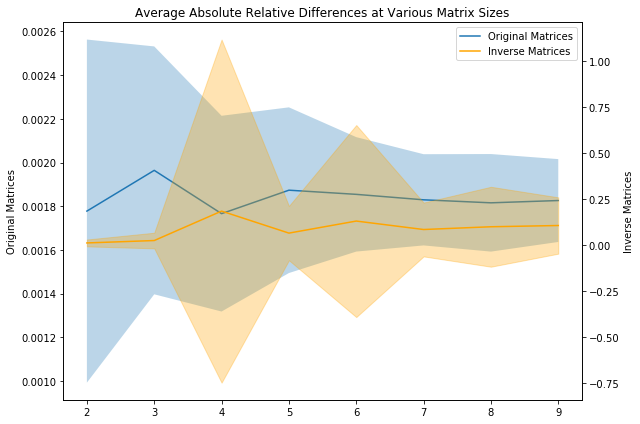

In [25]:
fig, ax1 = plt.subplots(figsize=(9,6))
ln1 = ax1.plot(x, y1, label="Original Matrices")
ax1.fill_between(x, y1-y1_err, y1+y1_err, alpha=0.3)
ax1.set_ylabel("Original Matrices")
# plt.yscale("symlog")


ax2 = ax1.twinx()
ln2 = ax2.plot(x, y2, color="orange", label="Inverse Matrices")
ax2.fill_between(x, y2-y2_err, y2+y2_err,alpha=0.3, color="orange")
ax2.set_ylabel("Inverse Matrices")
# plt.yscale("symlog")

lns = ln1+ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs)
plt.xlabel("Matrix Size")
plt.title("Average Absolute Relative Differences at Various Matrix Sizes")
plt.tight_layout()
plt.show()

fill between hi and low values

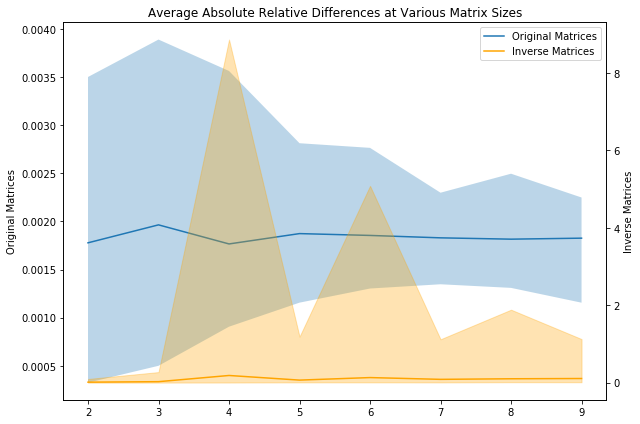

In [26]:
fig, ax1 = plt.subplots(figsize=(9,6))
ln1 = ax1.plot(x, y1, label="Original Matrices")
ax1.fill_between(x, y1_low, y1_hi, alpha=0.3)
ax1.set_ylabel("Original Matrices")
# plt.yscale("symlog")


ax2 = ax1.twinx()
ln2 = ax2.plot(x, y2, color="orange", label="Inverse Matrices")
ax2.fill_between(x, y2_low, y2_hi,alpha=0.3, color="orange")
ax2.set_ylabel("Inverse Matrices")
# plt.yscale("symlog")

lns = ln1+ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs)
plt.xlabel("Matrix Size")
plt.title("Average Absolute Relative Differences at Various Matrix Sizes")
plt.tight_layout()
plt.show()

## Postive Definite Symmetric Matrix: Plot of absolute relative differences vs matrix size

### Setup
Initialize empty arrays of size 100 for matrices for sizes $2\times2$ upto $10\times10$

In [3]:
orig_rel_diffs = np.zeros((8, 100))
inv_rel_diffs  = np.zeros((8, 100))
deltas = [0.001, 0.005, 0.002, 0.0001, 0.001, 0.001, 0.001, 0.002, 0.0001, 0.005]

* Each row correpsonds to matrix size
* Each column for individual matrices' average relative difference values between the unperturbed and perturbed versions of the matrix

In [30]:
k = 0
for n in range(2, 10):
    done = 0
    while done < 100:
        try:
            m = np.random.rand(n, n) * 10**(4) # returns values in [0,1) and scales them by 10^4 #chances of 0 negligible
            m = np.tril(m) + np.tril(m, -1).T # take lower triangle plu transpose (minus diagonal)
            m_inv = np.linalg.inv(m)
            m2 = m.copy()
            for i in range(len(m2)):
                for j in range(len(m2)):
                    if (i+j)%2:
                        m2[i, j] += np.random.choice(deltas)*m[i, j]
                    else:
                        m2[i, j] -= np.random.choice(deltas)*m[i, j]
            m2_inv = np.linalg.inv(m2)
            orig_rel_diff = abs((m2-m)/m).mean()
            inv_rel_diff = abs((m2_inv - m_inv)/m_inv).mean()
            orig_rel_diffs[k, done] = orig_rel_diff
            inv_rel_diffs[k, done] = inv_rel_diff
            if done == 0:
                print(k, n, done, orig_rel_diff)
            done += 1
        except:
            print(k)
            pass
    k += 1

0 2 0 0.0007999999999999694
1 3 0 0.002455555555555561
2 4 0 0.001224999999999982
3 5 0 0.0017439999999999906
4 6 0 0.0017833333333333238
5 7 0 0.0019142857142857306
6 8 0 0.0014546874999999992
7 9 0 0.0020024691358024667


Calculate the means and standard deviatoins of these values

In [31]:
x = np.arange(2, 10)

y1 = orig_rel_diffs.mean(axis=1)
y1_low = orig_rel_diffs.min(axis=1)
y1_hi = orig_rel_diffs.max(axis=1)
y1_err = orig_rel_diffs.std(axis=1)

y2 = inv_rel_diffs.mean(axis=1)
y2_low = inv_rel_diffs.min(axis=1)
y2_hi = inv_rel_diffs.max(axis=1)
y2_err = inv_rel_diffs.std(axis=1)

### Make the plot

fill between standard deviation around mean

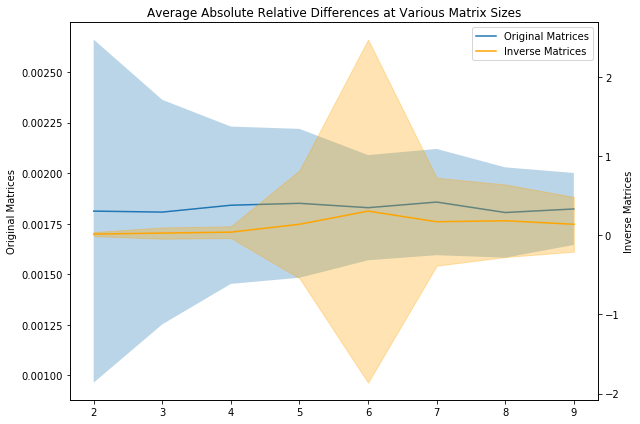

In [32]:
fig, ax1 = plt.subplots(figsize=(9,6))
ln1 = ax1.plot(x, y1, label="Original Matrices")
ax1.fill_between(x, y1-y1_err, y1+y1_err, alpha=0.3)
ax1.set_ylabel("Original Matrices")
# plt.yscale("symlog")


ax2 = ax1.twinx()
ln2 = ax2.plot(x, y2, color="orange", label="Inverse Matrices")
ax2.fill_between(x, y2-y2_err, y2+y2_err,alpha=0.3, color="orange")
ax2.set_ylabel("Inverse Matrices")
# plt.yscale("symlog")

lns = ln1+ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs)
plt.xlabel("Matrix Size")
plt.title("Average Absolute Relative Differences at Various Matrix Sizes")
plt.tight_layout()
plt.show()

fill between hi and low values

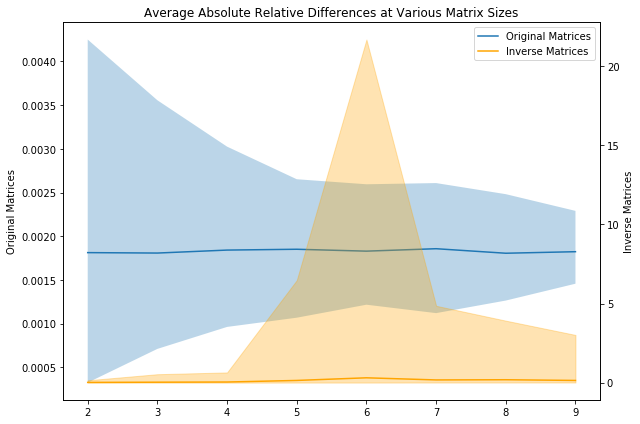

In [33]:
fig, ax1 = plt.subplots(figsize=(9,6))
ln1 = ax1.plot(x, y1, label="Original Matrices")
ax1.fill_between(x, y1_low, y1_hi, alpha=0.3)
ax1.set_ylabel("Original Matrices")
# plt.yscale("symlog")


ax2 = ax1.twinx()
ln2 = ax2.plot(x, y2, color="orange", label="Inverse Matrices")
ax2.fill_between(x, y2_low, y2_hi,alpha=0.3, color="orange")
ax2.set_ylabel("Inverse Matrices")
# plt.yscale("symlog")

lns = ln1+ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs)
plt.xlabel("Matrix Size")
plt.title("Average Absolute Relative Differences at Various Matrix Sizes")
plt.tight_layout()
plt.show()

## Check the Fisher Matrix

### Load CCL and Cosmosis fisher Matrices

In [3]:
paras = ["$\Omega_m$", "$w_0$", "$h_0$", "$A_s$", "$\Omega_b$", "$n_s$", "$w_a$"]
ccl_f = pd.DataFrame(np.loadtxt("ccl_cosmosis_binned_comparison/om_m_0.25/A_s_2.1e-9/out_ccl/fisher_out.dat"), index=paras, columns=paras)
cosmosis_f = pd.DataFrame(np.loadtxt("ccl_cosmosis_binned_comparison/om_m_0.25/A_s_2.1e-9/out_cosmosis/fisher_out.dat"), index=paras, columns=paras)

In [4]:
ccl_cov = pd.DataFrame(np.linalg.inv(ccl_f), index=paras, columns=paras)
cosmosis_cov = pd.DataFrame(np.linalg.inv(cosmosis_f), index=paras, columns=paras)

### Relative Differences

In [6]:
((ccl_f - cosmosis_f)/ccl_f).style.background_gradient(cmap=cmap, axis=None).set_caption("Fisher Relative Differences")

,$\Omega_m$,$w_0$,$h_0$,$A_s$,$\Omega_b$,$n_s$,$w_a$
$\Omega_m$,4.68171e-05,0.00191895,0.000326295,-0.000598432,-0.0014859,-0.000101374,0.000193318
$w_0$,0.00191895,0.00384416,0.00238524,0.00152741,0.000560797,0.00135543,0.00233763
$h_0$,0.000326295,0.00238524,0.000719528,-0.000177489,-0.0014063,-4.82369e-05,0.000584382
$A_s$,-0.000598432,0.00152741,-0.000177489,-0.00105413,-0.00247392,-0.000957028,-0.00041104
$\Omega_b$,-0.0014859,0.000560797,-0.0014063,-0.00247392,-0.00589811,-0.00018361,-0.00250707
$n_s$,-0.000101374,0.00135543,-4.82369e-05,-0.000957028,-0.00018361,-0.000614762,0.000683428
$w_a$,0.000193318,0.00233763,0.000584382,-0.00041104,-0.00250707,0.000683428,-3.31873e-05


In [8]:
#((ccl_cov - cosmosis_cov)/ccl_cov).to_csv("SRD/ccl_cosmosis_cov_rel_diffs.csv")

In [6]:
np.savetxt("SRD/ccl_cosmosis_rel_diffs.dat", (ccl_f - cosmosis_f)/ccl_f)

In [80]:
((ccl_cov - cosmosis_cov)/ccl_cov).style.background_gradient(cmap=cmap, axis=None).set_caption("Covariance Relative Differences")

,$\Omega_m$,$w_0$,$h_0$,$A_s$,$\Omega_b$,$n_s$,$w_a$
$\Omega_m$,0.790638,1.14491,0.770951,0.736194,0.781859,0.62023,1.00454
$w_0$,1.14491,0.353569,-11.453,0.0288472,-0.735273,14.8044,0.360006
$h_0$,0.770951,-11.453,0.672897,0.470695,0.682413,0.420222,13.1408
$A_s$,0.736194,0.0288472,0.470695,0.199609,0.466223,0.316516,0.0334453
$\Omega_b$,0.781859,-0.735273,0.682413,0.466223,0.650899,0.594547,-0.555167
$n_s$,0.62023,14.8044,0.420222,0.316516,0.594547,0.000314937,0.34509
$w_a$,1.00454,0.360006,13.1408,0.0334453,-0.555167,0.34509,0.298771


### Remove rows and columns one at a time and continue checking relative differences

#### Remove $\Omega_b$

In [70]:
paras.remove("$\Omega_b$")

In [71]:
ccl_f = ccl_f.drop(columns=["$\Omega_b$"]).drop(index=["$\Omega_b$"])
cosmosis_f = cosmosis_f.drop(columns=["$\Omega_b$"]).drop(index=["$\Omega_b$"])

In [72]:
ccl_cov = pd.DataFrame(np.linalg.inv(ccl_f), index=paras, columns=paras)
cosmosis_cov = pd.DataFrame(np.linalg.inv(cosmosis_f), index=paras, columns=paras)

In [73]:
((ccl_f - cosmosis_f)/ccl_f).style.background_gradient(cmap=cmap, axis=None).set_caption("Fisher Relative Differences")

,$\Omega_m$,$w_0$,$h_0$,$A_s$,$n_s$,$w_a$
$\Omega_m$,4.68171e-05,0.00191895,0.000326295,-0.000598432,-0.000101374,0.000193318
$w_0$,0.00191895,0.00384416,0.00238524,0.00152741,0.00135543,0.00233763
$h_0$,0.000326295,0.00238524,0.000719528,-0.000177489,-4.82369e-05,0.000584382
$A_s$,-0.000598432,0.00152741,-0.000177489,-0.00105413,-0.000957028,-0.00041104
$n_s$,-0.000101374,0.00135543,-4.82369e-05,-0.000957028,-0.000614762,0.000683428
$w_a$,0.000193318,0.00233763,0.000584382,-0.00041104,0.000683428,-3.31873e-05


In [74]:
((ccl_cov - cosmosis_cov)/ccl_cov).style.background_gradient(cmap=cmap, axis=None).set_caption("Covariance Relative Differences")

,$\Omega_m$,$w_0$,$h_0$,$A_s$,$n_s$,$w_a$
$\Omega_m$,0.569378,0.677074,0.519422,0.532881,0.113831,0.615139
$w_0$,0.677074,0.690868,0.699879,0.669371,0.665045,0.70013
$h_0$,0.519422,0.699879,0.221177,1.58203,-0.0574271,0.481066
$A_s$,0.532881,0.669371,1.58203,0.220451,-0.0838734,0.566952
$n_s$,0.113831,0.665045,-0.0574271,-0.0838734,-0.126414,0.047973
$w_a$,0.615139,0.70013,0.481066,0.566952,0.047973,0.589814


#### Remove $w_0$

In [75]:
paras.remove("$w_0$")

In [76]:
ccl_f = ccl_f.drop(columns=["$w_0$"]).drop(index=["$w_0$"])
cosmosis_f = cosmosis_f.drop(columns=["$w_0$"]).drop(index=["$w_0$"])

In [77]:
ccl_cov = pd.DataFrame(np.linalg.inv(ccl_f), index=paras, columns=paras)
cosmosis_cov = pd.DataFrame(np.linalg.inv(cosmosis_f), index=paras, columns=paras)

In [78]:
((ccl_f - cosmosis_f)/ccl_f).style.background_gradient(cmap=cmap, axis=None).set_caption("Fisher Relative Differences")

,$\Omega_m$,$h_0$,$A_s$,$n_s$,$w_a$
$\Omega_m$,4.68171e-05,0.000326295,-0.000598432,-0.000101374,0.000193318
$h_0$,0.000326295,0.000719528,-0.000177489,-4.82369e-05,0.000584382
$A_s$,-0.000598432,-0.000177489,-0.00105413,-0.000957028,-0.00041104
$n_s$,-0.000101374,-4.82369e-05,-0.000957028,-0.000614762,0.000683428
$w_a$,0.000193318,0.000584382,-0.00041104,0.000683428,-3.31873e-05


In [79]:
((ccl_cov - cosmosis_cov)/ccl_cov).style.background_gradient(cmap=cmap, axis=None).set_caption("Covariance Relative Differences")

,$\Omega_m$,$h_0$,$A_s$,$n_s$,$w_a$
$\Omega_m$,-0.14092,-0.226136,-0.159299,-0.417749,-0.249351
$h_0$,-0.226136,-0.104308,0.0870065,-0.135041,-0.155368
$A_s$,-0.159299,0.0870065,-0.0469232,0.234694,-0.218064
$n_s$,-0.417749,-0.135041,0.234694,-0.136221,-0.166052
$w_a$,-0.249351,-0.155368,-0.218064,-0.166052,-0.134859


#### Remove $A_s$

In [80]:
paras.remove("$A_s$")

In [81]:
ccl_f = ccl_f.drop(columns=["$A_s$"]).drop(index=["$A_s$"])
cosmosis_f = cosmosis_f.drop(columns=["$A_s$"]).drop(index=["$A_s$"])

In [82]:
ccl_cov = pd.DataFrame(np.linalg.inv(ccl_f), index=paras, columns=paras)
cosmosis_cov = pd.DataFrame(np.linalg.inv(cosmosis_f), index=paras, columns=paras)

In [83]:
((ccl_f - cosmosis_f)/ccl_f).style.background_gradient(cmap=cmap, axis=None).set_caption("Fisher Relative Differences")

,$\Omega_m$,$h_0$,$n_s$,$w_a$
$\Omega_m$,4.68171e-05,0.000326295,-0.000101374,0.000193318
$h_0$,0.000326295,0.000719528,-4.82369e-05,0.000584382
$n_s$,-0.000101374,-4.82369e-05,-0.000614762,0.000683428
$w_a$,0.000193318,0.000584382,0.000683428,-3.31873e-05


In [84]:
((ccl_cov - cosmosis_cov)/ccl_cov).style.background_gradient(cmap=cmap, axis=None).set_caption("Covariance Relative Differences")

,$\Omega_m$,$h_0$,$n_s$,$w_a$
$\Omega_m$,-0.116141,-0.176794,-0.303954,-0.225913
$h_0$,-0.176794,-0.159933,-0.182165,-0.143111
$n_s$,-0.303954,-0.182165,-0.161405,-0.148062
$w_a$,-0.225913,-0.143111,-0.148062,-0.110951


#### Remove $n_s$

In [85]:
paras.remove("$n_s$")

In [86]:
ccl_f = ccl_f.drop(columns=["$n_s$"]).drop(index=["$n_s$"])
cosmosis_f = cosmosis_f.drop(columns=["$n_s$"]).drop(index=["$n_s$"])

In [87]:
ccl_cov = pd.DataFrame(np.linalg.inv(ccl_f), index=paras, columns=paras)
cosmosis_cov = pd.DataFrame(np.linalg.inv(cosmosis_f), index=paras, columns=paras)

In [88]:
((ccl_f - cosmosis_f)/ccl_f).style.background_gradient(cmap=cmap, axis=None).set_caption("Fisher Relative Differences")

,$\Omega_m$,$h_0$,$w_a$
$\Omega_m$,4.68171e-05,0.000326295,0.000193318
$h_0$,0.000326295,0.000719528,0.000584382
$w_a$,0.000193318,0.000584382,-3.31873e-05


In [89]:
((ccl_cov - cosmosis_cov)/ccl_cov).style.background_gradient(cmap=cmap, axis=None).set_caption("Covariance Relative Differences")

,$\Omega_m$,$h_0$,$w_a$
$\Omega_m$,-0.0344066,-0.0275133,0.0113744
$h_0$,-0.0275133,-0.00948097,0.0332461
$w_a$,0.0113744,0.0332461,0.0462632


In [90]:
print("The relative differences of the std. deviations of the diagonals elements are:")
for i in range(3):
    print("%.3e"%((np.sqrt(ccl_cov.iloc[i,i]) - np.sqrt(cosmosis_cov.iloc[i,i]))/np.sqrt(ccl_cov.iloc[i,i])))

The relative differences of the std. deviations of the diagonals elements are:
-1.706e-02
-4.729e-03
2.341e-02


It seems like $n_s$ is a possible culprit. Let's start adding back rows and columns

#### Add back $A_s$

In [91]:
paras = ["$\Omega_m$", "$w_0$", "$h_0$", "$A_s$", "$\Omega_b$", "$n_s$", "$w_a$"]
ccl_f = pd.DataFrame(np.loadtxt("ccl_cosmosis_binned_comparison/om_m_0.25/A_s_2.1e-9/out_ccl/fisher_out.dat"), index=paras, columns=paras)
cosmosis_f = pd.DataFrame(np.loadtxt("ccl_cosmosis_binned_comparison/om_m_0.25/A_s_2.1e-9/out_cosmosis/fisher_out.dat"), index=paras, columns=paras)

In [92]:
ccl_f = ccl_f.drop(columns=["$n_s$", "$\Omega_b$", "$w_0$"]).drop(index=["$n_s$", "$\Omega_b$", "$w_0$"])
cosmosis_f = cosmosis_f.drop(columns=["$n_s$", "$\Omega_b$", "$w_0$"]).drop(index=["$n_s$", "$\Omega_b$", "$w_0$"])

In [93]:
for para in ["$n_s$", "$\Omega_b$", "$w_0$"]:
    paras.remove(para)

In [94]:
ccl_cov = pd.DataFrame(np.linalg.inv(ccl_f), index=paras, columns=paras)
cosmosis_cov = pd.DataFrame(np.linalg.inv(cosmosis_f), index=paras, columns=paras)

In [95]:
((ccl_f - cosmosis_f)/ccl_f).style.background_gradient(cmap=cmap, axis=None).set_caption("Fisher Relative Differences")

,$\Omega_m$,$h_0$,$A_s$,$w_a$
$\Omega_m$,4.68171e-05,0.000326295,-0.000598432,0.000193318
$h_0$,0.000326295,0.000719528,-0.000177489,0.000584382
$A_s$,-0.000598432,-0.000177489,-0.00105413,-0.00041104
$w_a$,0.000193318,0.000584382,-0.00041104,-3.31873e-05


In [96]:
((ccl_cov - cosmosis_cov)/ccl_cov).style.background_gradient(cmap=cmap, axis=None).set_caption("Covariance Relative Differences")

,$\Omega_m$,$h_0$,$A_s$,$w_a$
$\Omega_m$,-0.0714873,0.00215482,-0.12993,-0.0753328
$h_0$,0.00215482,-0.00893888,-0.0379582,1.02247
$A_s$,-0.12993,-0.0379582,-0.0701277,-0.0559586
$w_a$,-0.0753328,1.02247,-0.0559586,-0.00943266


#### Remove $h_0$

In [97]:
paras.remove("$h_0$")

In [98]:
ccl_f = ccl_f.drop(columns=["$h_0$"]).drop(index=["$h_0$"])
cosmosis_f = cosmosis_f.drop(columns=["$h_0$"]).drop(index=["$h_0$"])

In [99]:
ccl_cov = pd.DataFrame(np.linalg.inv(ccl_f), index=paras, columns=paras)
cosmosis_cov = pd.DataFrame(np.linalg.inv(cosmosis_f), index=paras, columns=paras)

In [100]:
((ccl_f - cosmosis_f)/ccl_f).style.background_gradient(cmap=cmap, axis=None).set_caption("Fisher Relative Differences")

,$\Omega_m$,$A_s$,$w_a$
$\Omega_m$,4.68171e-05,-0.000598432,0.000193318
$A_s$,-0.000598432,-0.00105413,-0.00041104
$w_a$,0.000193318,-0.00041104,-3.31873e-05


In [101]:
((ccl_cov - cosmosis_cov)/ccl_cov).style.background_gradient(cmap=cmap, axis=None).set_caption("Covariance Relative Differences")

,$\Omega_m$,$A_s$,$w_a$
$\Omega_m$,-0.0993095,-0.0974085,-0.0957866
$A_s$,-0.0974085,-0.0707026,-0.043633
$w_a$,-0.0957866,-0.043633,-0.00986026


In [102]:
pd.concat([ccl_f, cosmosis_f], axis=1, keys=["ccl fisher", "cosmosis fisher"])

ccl fisher                             cosmosis fisher  \
              $\Omega_m$         $A_s$         $w_a$      $\Omega_m$   
$\Omega_m$  1.454635e+07  8.054718e+14 -4.748888e+05    1.454567e+07   
$A_s$       8.054718e+14  4.482593e+22 -2.651743e+13    8.059539e+14   
$w_a$      -4.748888e+05 -2.651743e+13  1.577424e+04   -4.747970e+05   

                                        
                   $A_s$         $w_a$  
$\Omega_m$  8.059539e+14 -4.747970e+05  
$A_s$       4.487318e+22 -2.652833e+13  
$w_a$      -2.652833e+13  1.577476e+04

In [103]:
pd.concat([ccl_cov, cosmosis_cov], axis=1, keys=["ccl cov", "cosmosis cov"])

ccl cov                              cosmosis cov  \
              $\Omega_m$         $A_s$         $w_a$    $\Omega_m$   
$\Omega_m$  2.290268e-05 -6.593401e-13 -4.188967e-04  2.517714e-05   
$A_s$      -6.593401e-13  2.300475e-20  1.882269e-11 -7.235654e-13   
$w_a$      -4.188967e-04  1.882269e-11  1.909442e-02 -4.590214e-04   

                                        
                   $A_s$         $w_a$  
$\Omega_m$ -7.235654e-13 -4.590214e-04  
$A_s$       2.463125e-20  1.964398e-11  
$w_a$       1.964398e-11  1.928270e-02

**Note**: The matrix inversion seems to stabilize wrt to perturbations at around $3\times3$

## Check Eigenvalues using different routines

### Unscaled Fisher Matrix

First, using `np.eig`

In [81]:
ccl_w, ccl_v = np.linalg.eig(ccl_f)
cosmosis_w, cosmosis_v = np.linalg.eig(cosmosis_f)

In [82]:
eigenvalues_df = pd.DataFrame(np.vstack((ccl_w, cosmosis_w)).T, columns=["ccl", "cosmosis"])
eigenvalues_df["relative difference"] = \
    ((eigenvalues_df.ccl - eigenvalues_df.cosmosis)/(eigenvalues_df.ccl)).fillna(0)
eigenvalues_df["dot product of resp. eigenvecs"] = [np.dot(ccl_v[:, i], cosmosis_v[:, i]) for i in range(len(ccl_v))]
eigenvalues_df.style.set_caption("Eigenvalues from `np.eig`")

,ccl,cosmosis,relative difference,dot product of resp. eigenvecs
0,8.38861e+06,0,1,1
1,4.48259e+22,4.48732e+22,-0.00105413,1
2,69161.1,78046.4,-0.128473,0.952467
3,16605.9,17499.6,-0.0538163,-0.544675
4,1075.92,1134.31,-0.0542764,-0.264929
5,195.282,189.105,0.031634,0.246024
6,2.38293,3.16542,-0.328374,0.821499


Now, using `np.eigh`

In [83]:
ccl_w, ccl_v = np.linalg.eigh(ccl_f)
cosmosis_w, cosmosis_v = np.linalg.eigh(cosmosis_f)

In [84]:
eigenvalues_df = pd.DataFrame(np.vstack((ccl_w, cosmosis_w)).T, columns=["ccl", "cosmosis"])
eigenvalues_df["relative difference"] = \
    ((eigenvalues_df.ccl - eigenvalues_df.cosmosis)/(eigenvalues_df.ccl)).fillna(0)
eigenvalues_df["dot product of resp. eigenvecs"] = [np.dot(ccl_v[:, i], cosmosis_v[:, i]) for i in range(len(ccl_v))]
eigenvalues_df.style.set_caption("Eigenvalues from `np.eigh`")

,ccl,cosmosis,relative difference,dot product of resp. eigenvecs
0,-415.186,-432.962,-0.042816,0.999786
1,24.3322,21.609,0.111919,0.999893
2,899.249,937.064,-0.0420522,-0.999692
3,16504.9,17405.4,-0.0545626,-0.998085
4,69121.1,77975,-0.128093,0.998161
5,8.38837e+06,8.38843e+06,-6.16779e-06,1
6,4.48259e+22,4.48732e+22,-0.00105413,1


**Note**: Using `np.eigh` already clears up the 0 eigenvalue we were seeing earlier

#### Scaled Fisher Matrix

In [6]:
A_s_scaler = np.identity(len(ccl_f))
A_s_scaler[3,3] = 1e-9
ccl_f_scaled = np.dot(A_s_scaler,np.dot(ccl_f, A_s_scaler))
cosmosis_f_scaled = np.dot(A_s_scaler,np.dot(cosmosis_f, A_s_scaler))

In [8]:
# np.savetxt("ccl_cosmosis_binned_comparison/om_m_0.25/A_s_2.1e-9/out_ccl/scaled_fisher_out.dat", ccl_f_scaled)
# np.savetxt("ccl_cosmosis_binned_comparison/om_m_0.25/A_s_2.1e-9/out_cosmosis/scaled_fisher_out.dat", cosmosis_f_scaled)

First, using `np.eig`

In [86]:
ccl_w, ccl_v = np.linalg.eig(ccl_f_scaled)
cosmosis_w, cosmosis_v = np.linalg.eig(cosmosis_f_scaled)

In [87]:
scaled_eigen_df = pd.DataFrame(np.vstack((ccl_w, cosmosis_w)).T, columns=["ccl", "cosmosis"])
scaled_eigen_df["relative difference"] = \
    ((scaled_eigen_df.ccl - scaled_eigen_df.cosmosis)/(scaled_eigen_df.ccl)).fillna(0)
scaled_eigen_df["dot product of resp. eigenvecs"] = [np.dot(ccl_v[:, i], cosmosis_v[:, i]) for i in range(len(ccl_v))]
scaled_eigen_df.style.set_caption("Eigenvalues from `np.eig`")

,ccl,cosmosis,relative difference,dot product of resp. eigenvecs
0,2.15688e+07,2.15838e+07,-0.000697113,1
1,89169,99618,-0.117182,-0.999664
2,13538.2,13530.4,0.000576274,-0.999595
3,267.608,481.522,-0.79936,-0.859045
4,152.059,174.497,-0.147557,0.867352
5,10.3224,25.9559,-1.51452,0.967004
6,2.00915,2.67035,-0.329096,0.993912


Now, using `np.eigh`

In [88]:
ccl_w, ccl_v = np.linalg.eigh(ccl_f_scaled)
cosmosis_w, cosmosis_v = np.linalg.eigh(cosmosis_f_scaled)

In [89]:
scaled_eigen_df = pd.DataFrame(np.vstack((ccl_w, cosmosis_w)).T, columns=["ccl", "cosmosis"])
scaled_eigen_df["relative difference"] = \
    ((scaled_eigen_df.ccl - scaled_eigen_df.cosmosis)/(scaled_eigen_df.ccl)).fillna(0)
scaled_eigen_df["dot product of resp. eigenvecs"] = [np.dot(ccl_v[:, i], cosmosis_v[:, i]) for i in range(len(ccl_v))]
scaled_eigen_df.style.set_caption("Eigenvalues from `np.eigh`")

,ccl,cosmosis,relative difference,dot product of resp. eigenvecs
0,2.00915,2.67035,-0.329096,0.993912
1,10.3224,25.9559,-1.51452,0.967004
2,152.059,174.497,-0.147557,0.867352
3,267.608,481.522,-0.79936,0.859045
4,13538.2,13530.4,0.000576274,0.999595
5,89169,99618,-0.117182,0.999664
6,2.15688e+07,2.15838e+07,-0.000697113,1


**Note**: So scaling seems to make a difference and `np.eigh` also seemse to make a difference. Perhaps the the $10^{22}$ eigenvalue is an artifact of the scaling that the regular `np.eig` can't handle

## Playing with Inversion Routines

In [5]:
import scipy as sp

In [91]:
cond1 = np.linalg.cond(ccl_f)
cond2 = np.linalg.cond(cosmosis_f)
cond1_scaled = np.linalg.cond(ccl_f_scaled)
cond2_scaled = np.linalg.cond(cosmosis_f_scaled)

print("The condition number of CCL's fisher matrix is:", np.linalg.cond(ccl_f))
print("The condition number of Cosmosis' fisher matrix is:", np.linalg.cond(cosmosis_f))
print("The condition number of CCL's scaled fisher matrix is:", np.linalg.cond(ccl_f_scaled))
print("The condition number of Cosmosis' scaled fisher matrix is:", np.linalg.cond(cosmosis_f_scaled))

The condition number of CCL's fisher matrix is: 2.02736889550933e+22
The condition number of Cosmosis' fisher matrix is: 1.4183503423023853e+22
The condition number of CCL's scaled fisher matrix is: 10735274.11352627
The condition number of Cosmosis' scaled fisher matrix is: 8082755.063738394


The condition numbers are much larger than 1 in all cases, so the inverse is sensitive to changes in the input data and roundoff errors in the solution process.
So inverting these matrices will be tricky

### Method 0  Regular `np.linalg.inv`
This does LU decomposition 

In [12]:
ccl_cov_0 = pd.DataFrame(np.linalg.inv(ccl_f), index=paras, columns=paras)
cosmosis_cov_0 = pd.DataFrame(np.linalg.inv(cosmosis_f), index=paras, columns=paras)
ccl_scaled_cov_0 = pd.DataFrame(np.linalg.inv(ccl_f_scaled), index=paras, columns=paras)
cosmosis_scaled_cov_0 = pd.DataFrame(np.linalg.inv(cosmosis_f_scaled), index=paras, columns=paras)

In [13]:
((ccl_scaled_cov_0 - cosmosis_scaled_cov_0)/ccl_scaled_cov_0).to_csv("SRD/ccl_cosmosis_cov_scaled_rel_diffs.csv")

In [93]:
((ccl_cov_0-cosmosis_cov_0)/ccl_cov_0)\
.style.background_gradient(cmap=cmap, axis=None).set_caption("Unscaled Covariance Relative Differences")

,$\Omega_m$,$w_0$,$h_0$,$A_s$,$\Omega_b$,$n_s$,$w_a$
$\Omega_m$,0.790638,1.14491,0.770951,0.736194,0.781859,0.62023,1.00454
$w_0$,1.14491,0.353569,-11.453,0.0288472,-0.735273,14.8044,0.360006
$h_0$,0.770951,-11.453,0.672897,0.470695,0.682413,0.420222,13.1408
$A_s$,0.736194,0.0288472,0.470695,0.199609,0.466223,0.316516,0.0334453
$\Omega_b$,0.781859,-0.735273,0.682413,0.466223,0.650899,0.594547,-0.555167
$n_s$,0.62023,14.8044,0.420222,0.316516,0.594547,0.000314937,0.34509
$w_a$,1.00454,0.360006,13.1408,0.0334453,-0.555167,0.34509,0.298771


In [94]:
((ccl_scaled_cov_0-cosmosis_scaled_cov_0)/ccl_scaled_cov_0)\
.style.background_gradient(cmap=cmap, axis=None).set_caption("Scaled Covariance Relative Differences")

,$\Omega_m$,$w_0$,$h_0$,$A_s$,$\Omega_b$,$n_s$,$w_a$
$\Omega_m$,0.790638,1.14491,0.770951,0.736194,0.781859,0.62023,1.00454
$w_0$,1.14491,0.353569,-11.453,0.0288472,-0.735273,14.8044,0.360006
$h_0$,0.770951,-11.453,0.672897,0.470695,0.682413,0.420222,13.1408
$A_s$,0.736194,0.0288472,0.470695,0.199609,0.466223,0.316516,0.0334453
$\Omega_b$,0.781859,-0.735273,0.682413,0.466223,0.650899,0.594547,-0.555167
$n_s$,0.62023,14.8044,0.420222,0.316516,0.594547,0.000314937,0.34509
$w_a$,1.00454,0.360006,13.1408,0.0334453,-0.555167,0.34509,0.298771


### Method 1 `sp.linalg.cho_solve`
Since the fisher matrix is symmetric, we can use cholesky decomposition to compute the inverse instead of LU decomposition as `numpy.linalg.inv` does 

In [95]:
def cholesky_inv(A):
    return sp.linalg.cho_solve(sp.linalg.cho_factor(A), np.eye(len(A)))

In [96]:
ccl_cov_1 = pd.DataFrame(cholesky_inv(ccl_f), index=paras, columns=paras)
cosmosis_cov_1 = pd.DataFrame(cholesky_inv(cosmosis_f), index=paras, columns=paras)
ccl_scaled_cov_1 = pd.DataFrame(cholesky_inv(ccl_f_scaled), index=paras, columns=paras)
cosmosis_scaled_cov_1 = pd.DataFrame(cholesky_inv(cosmosis_f_scaled), index=paras, columns=paras)

In [97]:
((ccl_cov_1-cosmosis_cov_1)/ccl_cov_1).style.background_gradient(cmap=cmap, axis=None).set_caption("Unscaled Covariance Relative Differences")

,$\Omega_m$,$w_0$,$h_0$,$A_s$,$\Omega_b$,$n_s$,$w_a$
$\Omega_m$,0.790638,1.14491,0.770951,0.736194,0.781859,0.62023,1.00454
$w_0$,1.14491,0.353569,-11.453,0.0288472,-0.735273,14.8044,0.360006
$h_0$,0.770951,-11.453,0.672897,0.470695,0.682413,0.420222,13.1408
$A_s$,0.736194,0.0288472,0.470695,0.199609,0.466223,0.316516,0.0334453
$\Omega_b$,0.781859,-0.735273,0.682413,0.466223,0.650899,0.594547,-0.555167
$n_s$,0.62023,14.8044,0.420222,0.316516,0.594547,0.000314937,0.34509
$w_a$,1.00454,0.360006,13.1408,0.0334453,-0.555167,0.34509,0.298771


In [98]:
((ccl_scaled_cov_1-cosmosis_scaled_cov_1)/ccl_scaled_cov_1).style.background_gradient(cmap=cmap, axis=None).set_caption("Scaled Covariance Relative Differences")

,$\Omega_m$,$w_0$,$h_0$,$A_s$,$\Omega_b$,$n_s$,$w_a$
$\Omega_m$,0.790638,1.14491,0.770951,0.736194,0.781859,0.62023,1.00454
$w_0$,1.14491,0.353569,-11.453,0.0288472,-0.735273,14.8044,0.360006
$h_0$,0.770951,-11.453,0.672897,0.470695,0.682413,0.420222,13.1408
$A_s$,0.736194,0.0288472,0.470695,0.199609,0.466223,0.316516,0.0334453
$\Omega_b$,0.781859,-0.735273,0.682413,0.466223,0.650899,0.594547,-0.555167
$n_s$,0.62023,14.8044,0.420222,0.316516,0.594547,0.000314937,0.34509
$w_a$,1.00454,0.360006,13.1408,0.0334453,-0.555167,0.34509,0.298771


In [99]:
((ccl_scaled_cov_1-ccl_scaled_cov_1)/ccl_scaled_cov_0)\
.style.background_gradient(cmap=cmap, axis=None).set_caption("Scaled Covariance Relative Differences between LU and Cholesky")

,$\Omega_m$,$w_0$,$h_0$,$A_s$,$\Omega_b$,$n_s$,$w_a$
$\Omega_m$,0,0,-0,0,-0,0,-0
$w_0$,0,0,0,-0,0,0,-0
$h_0$,-0,0,0,-0,0,-0,0
$A_s$,0,-0,-0,0,-0,0,0
$\Omega_b$,-0,0,0,-0,0,-0,-0
$n_s$,0,0,-0,0,-0,0,-0
$w_a$,-0,-0,0,0,-0,-0,0


In [100]:
np.linalg.svd(ccl_f, compute_uv=False, hermitian=True)

array([4.48259278e+22, 9.54005569e+04, 5.89883452e+04, 5.22048115e+03,
       3.02564088e+01, 2.32699211e+01, 4.70826797e+02])

## Bounds on norm of inverse

see https://nvlpubs.nist.gov/nistpubs/jres/78B/jresv78Bn2p65_A1b.pdf

Let $A$ be a nonsingular matrix, $X$ is an approx inverse to $A$ such that $N(R) < 1 $ where $R = I - AX$ and $N$ is any matrix norm, then 
$$
\frac{N(XR)}{1+N(R)} \leq N(A^{-1} - X) \leq \frac{N(XR)}{1-N(R)}
$$
Below, we use the Frobenius/Euclidean norm:
$$
N(A) = \sqrt{\sum_{i=1}^n\sum_{j=i}^n |a_{ij}|^2}
$$

In [7]:
def get_bounds(A, inv_func, norm=None):
    X = inv_func(A)
    R = np.eye(len(A)) - np.dot(A, X)
    lower = norm(np.dot(X, R))/(1 + norm(R))
    upper = norm(np.dot(X, R))/(1 - norm(R))
    return lower, upper

#### regular `np.linalg.inv`

In [102]:
lu_l1, lu_u1 = get_bounds(ccl_f, np.linalg.inv, sp.linalg.norm) # this uses the 2-norm
print("For the regular numpy inverse,\nthe lower bound is %e,\nthe upper bound is %e,\nand the spread is %e"%(lu_l1,lu_u1, lu_u1-lu_l1))

For the regular numpy inverse,
the lower bound is 4.421816e-13,
the upper bound is 4.431954e-13,
and the spread is 1.013768e-15


In [103]:
lu_l2, lu_u2 = get_bounds(cosmosis_f, np.linalg.inv, sp.linalg.norm) # this uses the 2-norm
print("For the regular numpy inverse,\nthe lower bound is %e,\nthe upper bound is %e,\nand the spread is %e"%(lu_l2,lu_u2, lu_u2-lu_l2))

For the regular numpy inverse,
the lower bound is 2.278384e-13,
the upper bound is 2.279347e-13,
and the spread is 9.629905e-17


In [8]:
lu_l1_scaled, lu_u1_scaled = get_bounds(ccl_f_scaled, np.linalg.inv, sp.linalg.norm) # this uses the 2-norm
print("For the regular numpy inverse,\nthe lower bound is %e,\nthe upper bound is %e,\nand the spread is %e"%(lu_l1_scaled,lu_u1_scaled, lu_u1_scaled-lu_l1_scaled))

For the regular numpy inverse,
the lower bound is 1.884429e-12,
the upper bound is 1.884429e-12,
and the spread is 1.704961e-22


In [10]:
print(lu_l1_scaled)
print(lu_u1_scaled)

1.884429132379796e-12
1.884429132550292e-12


In [11]:
lu_l2_scaled, lu_u2_scaled = get_bounds(cosmosis_f_scaled, np.linalg.inv, sp.linalg.norm) # this uses the 2-norm
print("For the regular numpy inverse,\nthe lower bound is %e,\nthe upper bound is %e,\nand the spread is %e"%(lu_l2_scaled,lu_u2_scaled, lu_u2_scaled-lu_l2_scaled))

For the regular numpy inverse,
the lower bound is 3.087353e-13,
the upper bound is 3.087353e-13,
and the spread is 2.279412e-23


In [13]:
print(lu_l2_scaled)
print(lu_u2_scaled)

3.087352994061563e-13
3.087352994289504e-13


#### `cholesky` inverse

In [106]:
cho_l1, cho_u1 = get_bounds(ccl_f, cholesky_inv, sp.linalg.norm) # this uses the 2-norm
print("For the regular numpy inverse,\nthe lower bound is %e,\nthe upper bound is %e,\nand the spread is %e"%(cho_l1,cho_u1, cho_u1-cho_l1))

For the regular numpy inverse,
the lower bound is 2.341865e-12,
the upper bound is 2.357554e-12,
and the spread is 1.568897e-14


In [107]:
cho_l2, cho_u2 = get_bounds(cosmosis_f, cholesky_inv, sp.linalg.norm) # this uses the 2-norm
print("For the regular numpy inverse,\nthe lower bound is %e,\nthe upper bound is %e,\nand the spread is %e"%(cho_l2,cho_u2, cho_u2-cho_l2))

For the regular numpy inverse,
the lower bound is 1.659928e-13,
the upper bound is 1.661935e-13,
and the spread is 2.006505e-16


In [108]:
cho_l1_scaled, cho_u1_scaled = get_bounds(ccl_f_scaled, cholesky_inv, sp.linalg.norm) # this uses the 2-norm
print("For the regular numpy inverse,\nthe lower bound is %e,\nthe upper bound is %e,\nand the spread is %e"%(cho_l1_scaled,cho_u1_scaled, cho_u1_scaled-cho_l1_scaled))

For the regular numpy inverse,
the lower bound is 3.441255e-12,
the upper bound is 3.441255e-12,
and the spread is 5.369949e-22


In [109]:
cho_l2_scaled, cho_u2_scaled = get_bounds(cosmosis_f_scaled, cholesky_inv, sp.linalg.norm) # this uses the 2-norm
print("For the regular numpy inverse,\nthe lower bound is %e,\nthe upper bound is %e,\nand the spread is %e"%(cho_l2_scaled,cho_u2_scaled, cho_u2_scaled-cho_l2_scaled))

For the regular numpy inverse,
the lower bound is 3.409873e-13,
the upper bound is 3.409873e-13,
and the spread is 1.728744e-23


# Figure of Merit Comparisons

In [110]:
paras = ["$\Omega_m$", "$w_0$", "$h_0$", "$A_s$", "$\Omega_b$", "$n_s$", "$w_a$"]

# some functions to calculate the figure of merit for any pair of parameters
def marg_cov(cov, para1, para2):
    ind1 = paras.index(para1)
    ind2 = paras.index(para2)
    inds = np.asarray((ind1, ind2))
    # first get all indeces to remove
    all_cov_inds = range(len(cov[0]))
    del_inds = np.delete(all_cov_inds, inds)
    # then delete rows and cols
    marged_cov = np.delete(np.delete(cov, del_inds, 0), del_inds, 1)
    return marged_cov

def calc_fom(cov):
    # takes marg cov matrix
    # inverts it to get reduced fisher matrix
    # returns sqrt of det of fisher matrix
    fisher = np.linalg.inv(cov)
    FOM = np.sqrt(np.linalg.det(fisher))
    return FOM

def fom(fisher, para1, para2, inv=np.linalg.inv):
    cov = inv(fisher)
    marged_cov = marg_cov(cov, para1, para2)
    return calc_fom(marged_cov)

In [111]:
# plotting helper function
def plot_cov_ellipse(cov, pos, nstd=1, ax=None, **kwargs):
    """
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Additional keyword arguments are passed on to the
    ellipse patch artist.
    Parameters
    ----------
    cov :  The 2x2 covariance matrix to base the ellipse on
    pos :  The location of the center of the ellipse. Expects a 2-element
           sequence of [x0, y0].
    nstd : The radius of the ellipse in numbers of standard deviations.
           Defaults to 2 standard deviations.
    ax :   The axis that the ellipse will be plotted on. Defaults to the
           current axis.
    Additional keyword arguments are pass on to the ellipse patch.

    Returns:
    -------
    A matplotlib ellipse artist
    """

    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    #print vals, vecs

    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Calculate chi squared correction for ellipse
    # Uses chi2 pdf with 2 degrees of freedom
    # note ppf is the quantile function
    def chi2correction(nstd):

        def get_conf_level(ntsd):
            # if X ~ N(u, s) gaussian,
            # then this function returns
            # Pr(u - ntsd*s < X < u + ntsd*s)
            # 
            # nstd 1 -> .6827
            # ntsd 2 -> .9545
            # ntsd 3 -> .9973
            return 1 - (1 - norm().cdf(ntsd))*2
        
        conf_level = get_conf_level(nstd)
        return np.sqrt(chi2(2).ppf(conf_level))

    # Width and height are "full" widths, not radius
    width, height = 2 * chi2correction(nstd) * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)
    ellip.set_facecolor('none')
    plt.gca().add_patch(ellip)
    return ellip

### FoM for $w_0$ and $w_a$

In [112]:
w_fom1 = fom(ccl_f, "$w_0$", "$w_a$")
w_fom2 = fom(cosmosis_f, "$w_0$", "$w_a$")

In [113]:
print("Original Fisher FoM: %.4f"%w_fom1)
print("Modified Fisher FoM: %.4f"%w_fom2)
print("Relative Difference: %.4f"%((w_fom2-w_fom1)/w_fom1))

Original Fisher FoM: 25.2396
Modified Fisher FoM: 29.5047
Relative Difference: 0.1690


Plot the ellipses

In [114]:
from scipy.stats import norm, chi2
from matplotlib.patches import Ellipse

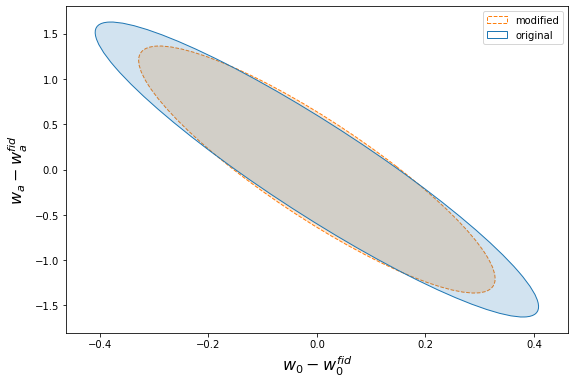

In [115]:
plt.subplots(figsize=(9,6))

mc1 = marg_cov(np.linalg.inv(ccl_f), "$w_0$", "$w_a$")
mc2 = marg_cov(np.linalg.inv(cosmosis_f), "$w_0$", "$w_a$")

el2 = plot_cov_ellipse(mc2, (0,0), nstd=2)
el2.set_facecolor("C1")
el2.set_alpha(0.2)
el2 = plot_cov_ellipse(mc2, (0,0), nstd=2, label="modified", linestyle="--")
el2.set_edgecolor("C1")

el1 = plot_cov_ellipse(mc1, (0,0), nstd=2)
el1.set_facecolor("C0")
el1.set_alpha(0.2)
el1 = plot_cov_ellipse(mc1, (0,0), nstd=2, label="original")
el1.set_edgecolor("C0")

plt.autoscale()
plt.legend()
plt.xlabel(r'$w_0 - w_0^{fid}$', fontsize=16)
plt.ylabel(r'$w_a - w_a^{fid}$', fontsize=16)
plt.show()

### FoM for $w_0$ and $w_a$ from scaled Fishers

In [116]:
w_fom1_scaled = fom(ccl_f_scaled, "$w_0$", "$w_a$")
w_fom2_scaled = fom(cosmosis_f_scaled, "$w_0$", "$w_a$")

In [117]:
print("Original Fisher FoM: %.4f"%w_fom1_scaled)
print("Modified Fisher FoM: %.4f"%w_fom2_scaled)
print("Relative Difference: %.4f"%((w_fom2_scaled-w_fom1_scaled)/w_fom1_scaled))

Original Fisher FoM: 25.2396
Modified Fisher FoM: 29.5047
Relative Difference: 0.1690


Plot the ellipses

In [118]:
from scipy.stats import norm, chi2
from matplotlib.patches import Ellipse

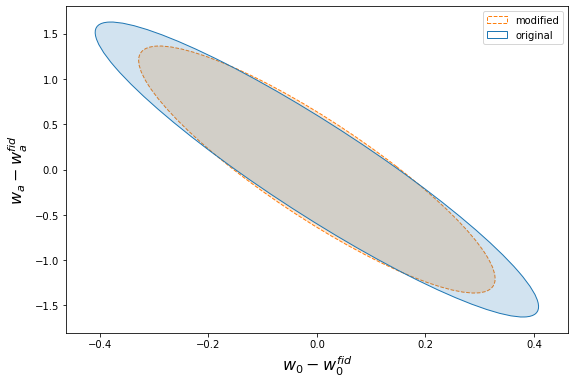

In [119]:
plt.subplots(figsize=(9,6))

mc1 = marg_cov(np.linalg.inv(ccl_f_scaled), "$w_0$", "$w_a$")
mc2 = marg_cov(np.linalg.inv(cosmosis_f_scaled), "$w_0$", "$w_a$")

el2 = plot_cov_ellipse(mc2, (0,0), nstd=2)
el2.set_facecolor("C1")
el2.set_alpha(0.2)
el2 = plot_cov_ellipse(mc2, (0,0), nstd=2, label="modified", linestyle="--")
el2.set_edgecolor("C1")

el1 = plot_cov_ellipse(mc1, (0,0), nstd=2)
el1.set_facecolor("C0")
el1.set_alpha(0.2)
el1 = plot_cov_ellipse(mc1, (0,0), nstd=2, label="original")
el1.set_edgecolor("C0")

plt.autoscale()
plt.legend()
plt.xlabel(r'$w_0 - w_0^{fid}$', fontsize=16)
plt.ylabel(r'$w_a - w_a^{fid}$', fontsize=16)
plt.show()

### FoM for $\Omega_m$ and $A_s$

In [120]:
om_fom1 = fom(ccl_f, "$\Omega_m$", "$A_s$")
om_fom2 = fom(cosmosis_f, "$\Omega_m$", "$A_s$")

In [121]:
print("Original Fisher FoM: %.4f"%om_fom1)
print("Modified Fisher FoM: %.4f"%om_fom2)
print("Relative Difference: %.4f"%((om_fom2-om_fom1)/om_fom1))

Original Fisher FoM: 96069220331.7529
Modified Fisher FoM: 220523297946.9893
Relative Difference: 1.2955


Plot the ellipses

In [122]:
from scipy.stats import norm, chi2
from matplotlib.patches import Ellipse

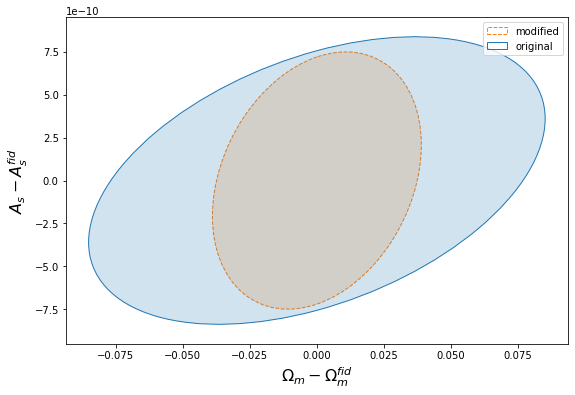

In [123]:
plt.subplots(figsize=(9,6))

mc1 = marg_cov(np.linalg.inv(ccl_f), "$\Omega_m$", "$A_s$")
mc2 = marg_cov(np.linalg.inv(cosmosis_f), "$\Omega_m$", "$A_s$")

el2 = plot_cov_ellipse(mc2, (0,0), nstd=2)
el2.set_facecolor("C1")
el2.set_alpha(0.2)
el2 = plot_cov_ellipse(mc2, (0,0), nstd=2, label="modified", linestyle="--")
el2.set_edgecolor("C1")

el1 = plot_cov_ellipse(mc1, (0,0), nstd=2)
el1.set_facecolor("C0")
el1.set_alpha(0.2)
el1 = plot_cov_ellipse(mc1, (0,0), nstd=2, label="original")
el1.set_edgecolor("C0")

plt.autoscale()
plt.legend()
plt.xlabel(r'$\Omega_m - \Omega_m^{fid}$', fontsize=16)
plt.ylabel(r'$A_s - A_s^{fid}$', fontsize=16)
plt.show()

### FoM for $\Omega_m$ and $10^9 A_s$ for scaled Fishers

In [124]:
om_fom1_scaled = fom(ccl_f_scaled, "$\Omega_m$", "$A_s$")
om_fom2_scaled = fom(cosmosis_f_scaled, "$\Omega_m$", "$A_s$")

In [125]:
print("Original Fisher FoM: %.4f"%om_fom1_scaled)
print("Modified Fisher FoM: %.4f"%om_fom2_scaled)
print("Relative Difference: %.4f"%((om_fom2_scaled-om_fom1_scaled)/om_fom1_scaled))

Original Fisher FoM: 96.0692
Modified Fisher FoM: 220.5233
Relative Difference: 1.2955


Plot the ellipses

In [126]:
from scipy.stats import norm, chi2
from matplotlib.patches import Ellipse

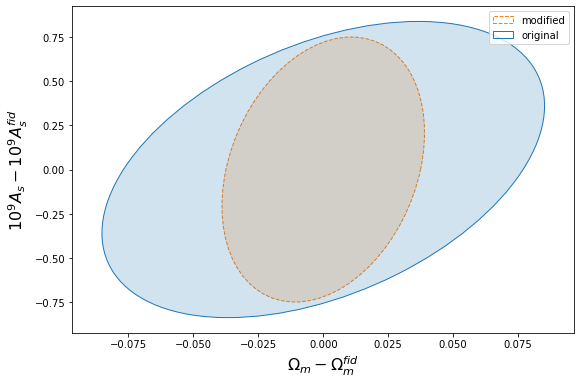

In [127]:
plt.subplots(figsize=(9,6))

mc1 = marg_cov(np.linalg.inv(ccl_f_scaled), "$\Omega_m$", "$A_s$")
mc2 = marg_cov(np.linalg.inv(cosmosis_f_scaled), "$\Omega_m$", "$A_s$")

el2 = plot_cov_ellipse(mc2, (0,0), nstd=2)
el2.set_facecolor("C1")
el2.set_alpha(0.2)
el2 = plot_cov_ellipse(mc2, (0,0), nstd=2, label="modified", linestyle="--")
el2.set_edgecolor("C1")

el1 = plot_cov_ellipse(mc1, (0,0), nstd=2)
el1.set_facecolor("C0")
el1.set_alpha(0.2)
el1 = plot_cov_ellipse(mc1, (0,0), nstd=2, label="original")
el1.set_edgecolor("C0")

plt.autoscale()
plt.legend()
plt.xlabel(r'$\Omega_m - \Omega_m^{fid}$', fontsize=16)
plt.ylabel(r'$10^9A_s - 10^9A_s^{fid}$', fontsize=16)
plt.show()

# Save info of matrices out 

Make an array containing:
1. condition number
2. w0_wa FoM
3. om_m A_s FoM
3. om_m sigma_8 FoM
4. Spread on Norm of LU Inverse - Actual Inverse
4. Spread on Norm of Cholesky Inverse - Actual Inverse

In [128]:
info1 = np.array([cond1, w_fom1, om_fom1, np.nan, np.NaN, lu_u1-lu_l1, cho_u1-cho_l1])
info2 = np.array([cond2, w_fom2, om_fom2, np.nan, np.NaN, lu_u2-lu_l2, cho_u2-cho_l2])

In [129]:
info1_scaled = np.array([cond1_scaled, w_fom1_scaled, np.nan, om_fom1_scaled, np.NaN, lu_u1_scaled-lu_l1_scaled, cho_u1_scaled-cho_l1_scaled])
info2_scaled = np.array([cond2_scaled, w_fom2_scaled, np.nan, om_fom2_scaled, np.NaN, lu_u2_scaled-lu_l2_scaled, cho_u2_scaled-cho_l2_scaled])

In [130]:
np.savetxt("SRD/ccl_info.txt", info1)
np.savetxt("SRD/cosmosis_info.txt", info2)

In [131]:
np.savetxt("SRD/ccl_scaled_info.txt", info1_scaled)
np.savetxt("SRD/cosmosis_scaled_info.txt", info2_scaled)

In [7]:
ccl_f

,$\Omega_m$,$w_0$,$h_0$,$A_s$,$\Omega_b$,$n_s$,$w_a$
$\Omega_m$,1.454635e+07,-1.470808e+06,5.355630e+06,8.054718e+14,-8.248393e+06,1.373576e+06,-4.748888e+05
$w_0$,-1.470808e+06,1.502973e+05,-5.428171e+05,-8.186928e+13,8.393905e+05,-1.353733e+05,4.862162e+04
$h_0$,5.355630e+06,-5.428171e+05,1.978364e+06,2.974796e+14,-3.064284e+06,5.061444e+05,-1.757612e+05
$A_s$,8.054718e+14,-8.186928e+13,2.974796e+14,4.482593e+22,-4.603611e+14,7.527183e+13,-2.651743e+13
$\Omega_b$,-8.248393e+06,8.393905e+05,-3.064284e+06,-4.603611e+14,4.794231e+06,-7.809371e+05,2.730627e+05
$n_s$,1.373576e+06,-1.353733e+05,5.061444e+05,7.527183e+13,-7.809371e+05,1.420500e+05,-4.367035e+04
$w_a$,-4.748888e+05,4.862162e+04,-1.757612e+05,-2.651743e+13,2.730627e+05,-4.367035e+04,1.577424e+04


In [31]:
p1, p2 = 0, 3
np.sqrt(np.linalg.det(np.linalg.inv(np.linalg.inv(ccl_f)[[p1,p2]][:, [p1,p2]])))

960.6922033175294

In [34]:
ccl_f["$A_s$"]*10**(-9)

$\Omega_m$    8.054718e+05
$w_0$        -8.186928e+04
$h_0$         2.974796e+05
$A_s$         4.482593e+13
$\Omega_b$   -4.603611e+05
$n_s$         7.527183e+04
$w_a$        -2.651743e+04
Name: $A_s$, dtype: float64

In [41]:
ccl_f.values[[p1,p2]][:, [p1,p2]]

array([[1.45463533e+07, 8.05471841e+14],
       [8.05471841e+14, 4.48259278e+22]])

In [40]:
ccl_f_scaled[[p1,p2]][:, [p1,p2]]

array([[14546353.33550268,  8054718.40705063],
       [ 8054718.40705063,  4482592.77727011]])

In [52]:
def fom_test(f, p1, p2):
    return np.sqrt(np.linalg.det(np.linalg.inv(np.linalg.inv(f)[[p1,p2]][:, [p1,p2]])))

In [48]:
f_test = ccl_f.values

In [49]:
f_test

array([[1.45463533e+07, 8.05471841e+14],
       [8.05471841e+14, 4.48259278e+22]])

In [54]:
fom_test(ccl_f.values, 0, 3)

96069220331.75294

In [59]:
pd.DataFrame(ccl_cov)

,$\Omega_m$,$w_0$,$h_0$,$A_s$,$\Omega_b$,$n_s$,$w_a$
$\Omega_m$,1.172924e-03,1.599450e-03,-5.801088e-03,4.956262e-12,-1.065900e-03,4.630654e-04,-6.191010e-03
$w_0$,1.599450e-03,2.700649e-02,6.064060e-04,-3.048681e-11,1.187979e-03,4.908398e-05,-1.000135e-01
$h_0$,-5.801088e-03,6.064060e-04,3.289864e-02,-4.250457e-11,6.251747e-03,-3.133178e-03,1.704848e-03
$A_s$,4.956262e-12,-3.048681e-11,-4.250457e-11,1.133195e-19,-9.118651e-12,3.673216e-12,1.280981e-10
$\Omega_b$,-1.065900e-03,1.187979e-03,6.251747e-03,-9.118651e-12,1.288452e-03,-4.479295e-04,-4.965274e-03
$n_s$,4.630654e-04,4.908398e-05,-3.133178e-03,3.673216e-12,-4.479295e-04,8.054846e-04,-4.962542e-03
$w_a$,-6.191010e-03,-1.000135e-01,1.704848e-03,1.280981e-10,-4.965274e-03,-4.962542e-03,4.285068e-01


In [60]:
pd.DataFrame(np.linalg.inv(ccl_f_scaled))

,0,1,2,3,4,5,6
0,0.001173,0.001599,-0.005801,0.000496,-0.001066,0.000463,-0.006191
1,0.001599,0.027006,0.000606,-0.003049,0.001188,0.000049,-0.100013
2,-0.005801,0.000606,0.032899,-0.004250,0.006252,-0.003133,0.001705
3,0.000496,-0.003049,-0.004250,0.001133,-0.000912,0.000367,0.012810
4,-0.001066,0.001188,0.006252,-0.000912,0.001288,-0.000448,-0.004965
5,0.000463,0.000049,-0.003133,0.000367,-0.000448,0.000805,-0.004963
6,-0.006191,-0.100013,0.001705,0.012810,-0.004965,-0.004963,0.428507


In [61]:
4.956262e-12/0.000496

9.992463709677418e-09

In [62]:
ccl_f

,$\Omega_m$,$w_0$,$h_0$,$A_s$,$\Omega_b$,$n_s$,$w_a$
$\Omega_m$,1.454635e+07,-1.470808e+06,5.355630e+06,8.054718e+14,-8.248393e+06,1.373576e+06,-4.748888e+05
$w_0$,-1.470808e+06,1.502973e+05,-5.428171e+05,-8.186928e+13,8.393905e+05,-1.353733e+05,4.862162e+04
$h_0$,5.355630e+06,-5.428171e+05,1.978364e+06,2.974796e+14,-3.064284e+06,5.061444e+05,-1.757612e+05
$A_s$,8.054718e+14,-8.186928e+13,2.974796e+14,4.482593e+22,-4.603611e+14,7.527183e+13,-2.651743e+13
$\Omega_b$,-8.248393e+06,8.393905e+05,-3.064284e+06,-4.603611e+14,4.794231e+06,-7.809371e+05,2.730627e+05
$n_s$,1.373576e+06,-1.353733e+05,5.061444e+05,7.527183e+13,-7.809371e+05,1.420500e+05,-4.367035e+04
$w_a$,-4.748888e+05,4.862162e+04,-1.757612e+05,-2.651743e+13,2.730627e+05,-4.367035e+04,1.577424e+04


In [73]:
pd.DataFrame(ccl_f_scaled)

,0,1,2,3,4,5,6
0,1.454635e+07,-1.470808e+06,5.355630e+06,8.054718e+06,-8.248393e+06,1.373576e+06,-474888.781816
1,-1.470808e+06,1.502973e+05,-5.428171e+05,-8.186928e+05,8.393905e+05,-1.353733e+05,48621.621014
2,5.355630e+06,-5.428171e+05,1.978364e+06,2.974796e+06,-3.064284e+06,5.061444e+05,-175761.248589
3,8.054718e+06,-8.186928e+05,2.974796e+06,4.482593e+06,-4.603611e+06,7.527183e+05,-265174.308811
4,-8.248393e+06,8.393905e+05,-3.064284e+06,-4.603611e+06,4.794231e+06,-7.809371e+05,273062.699614
5,1.373576e+06,-1.353733e+05,5.061444e+05,7.527183e+05,-7.809371e+05,1.420500e+05,-43670.350762
6,-4.748888e+05,4.862162e+04,-1.757612e+05,-2.651743e+05,2.730627e+05,-4.367035e+04,15774.241244


In [74]:
8.054718e+14/8.054718e+06 == 1e8

True

In [1]:
f_ccl

NameError: name 'f_ccl' is not defined